# Machine Learning Demo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Import and Review Data

In [2]:
df = pd.read_csv('./Data/pima-indian-diabetes-data.csv') #load data, assumes first line is header

In [3]:
#Take a look at the head of the data
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
##Also peak at the tail end of the data
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features

From the metadata on the data source we have the following definition of the features:

|Feature|Description|
|-----------------|--------------|
|num_preg | number of pregnancies|
|glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|diastolic_bp | Diastolic blood pressure (mm Hg)|
|thickness | Triceps skin fold thickness|
|insulin |2-Hour serum insulin|
|bmi |body mass index (weight in kg/(height in m)^2)|
|diab_pred | Diabetes pedigree function|
|Age (years) | self-explanatory|
|skin |N/A|
|diabetes | class variable|

In [5]:
#Check for null values
df.isnull().values.any()

False

In [6]:
def plot_corr(df, size=11):
    """
    Plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. DarkBlue-Blue-Turquoise-Yellow --> less to more correlated
                                                0 ----------------------> 1
    """
    #Create correlation plot data
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    

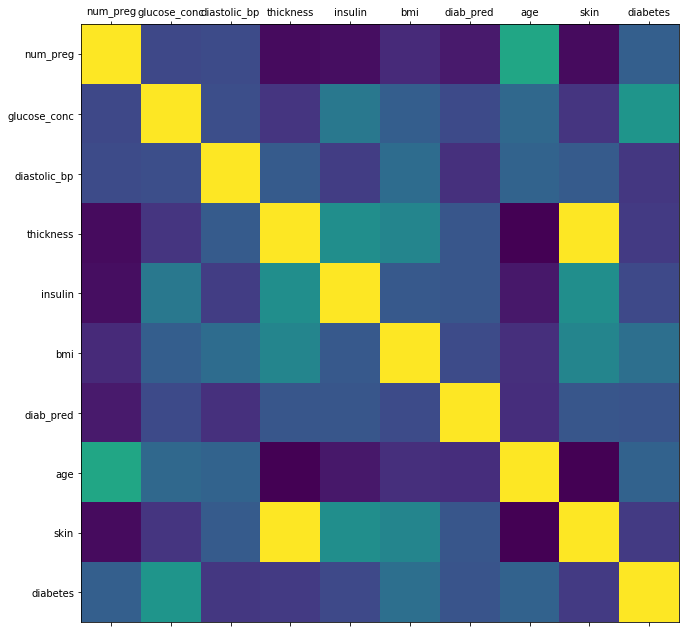

In [7]:
plot_corr(df)

- Expected high correlation on the diagonal, but skin and thickness happened to be 1:1 correlation as well. 
- Adds no additional informational, because they are changing in lockstep. Can either make note, don’t use both columns at same time, or drop one. 
- Skin was actually thickness, but converted to a different metric.

In [8]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
# Delete skin column
del df['skin']

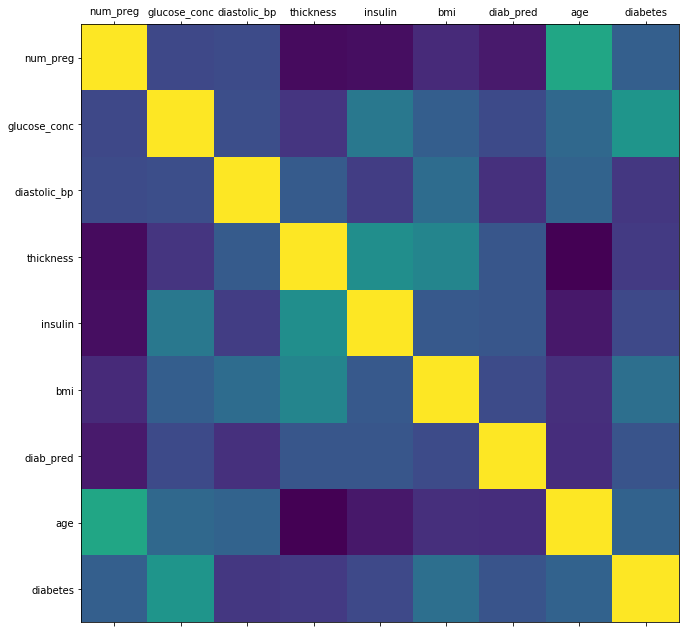

In [10]:
plot_corr(df)

### Check Data Types

In [11]:
#Check head again, to look at true and false column
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0

In [12]:
diabetes_map = {True : 1, False: 0}

In [13]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Data is almost ready now. But we need to make sure that the data distribution will allow us to train a prediction.
- Data Rule #3: Accurately predicting rare events is difficult.
- Rare events are...rare. More of the rare data is better because then it will allow for the algorithm to be able to recognize when those rare events will occur.

### Check true/false ratio

In [15]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


True and False occurrences distributed well, no additional work needed.

- Data is decently distributed, nothing like 5 or 10 percent of one classification
- In the case that data is skewed one way, we would need special techniques and more complex algorithms to train the model
- Data rule #4: track how you manipulate the data. So much of ML is trial and error, so it can be hard to remember how you get here. Good manipulation can also be done unintentionally. Jupyter Notebook helps, and it's good to keep records.
- Use markup cells to keep track
- **Go to slides at this point**

## Splitting the data
70% for training, 30% for data

In [16]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values #predictor feature columns ( 8 X m)
y=df[predicted_class_names].values #predicted class (1=true, 0==false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
    # test_size = 0.3 is 30%, and use random state

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


- random state is used so that any time you split the data, you start from the same random state, and that way you can get get the same results if you re-do your testing

Check to ensure we have the desired 70% train, and 30% split of the data

In [17]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in testing set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in testing set


- Also need to verify that the ratio of true and false in both training and test data are the same

### Verify predicted value was split correctly

In [18]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100))
print("Original False  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training False  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("")
print("Testing True  : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Testing False  : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))


Original True  : 268 (34.90%)
Original False  : 500 (34.90%)

Training True  : 188 (35.01%)
Training False  : 349 (35.01%)

Testing True  : 80 (34.63%)
Testing False  : 151 (34.63%)


### Post-split Data Preparation

- may need additional adjustments to data sets, but adjust separately for training and test

#### Hidden Missing Values

In [19]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Looking at skin thickness, 3rd entry is 0. This is a hidden missing value
- Likely someone didn't retrieve that dataset for the participant, and put 0 instead of null.

How many rows have unexpected 0 values?

In [20]:
print ("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))


# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


- just from my basic biology background, I can tell you that none of these fields can be 0, other than insulin, but even then that person would be in critical health condition. you can also google search to find these out.
- so now this means we have missing data, which is a common problem
- options to deal with it: Ignore, Drop observations, or replace values by interpreting them.
- 374 of the 768 rows have missing values, so half our data would be deleted
- Imputing can be done by replacing with mean/median, or replace the value by deriving it from other feature values in the row, but would require domain expertise

#### Impute with the mean

In [21]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

- axis=0 is specifying column
- must be done separately for test and training data, so that they do not affect one another, since their means are different

## Training Initial Algorithm - Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

- use metrics package to measure performance of model

In [23]:
# predict values using the training data
nb_predict_train = nb_model.predict (X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



- nb_predict_train is an array of values from prediction

### Performance on Testing Data

In [24]:
# predict values using the testing data
nb_predict_test = nb_model.predict (X_test)

from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7359



- achieved greater than 70% accuracy, so we are done, because that was our goal.
- let's take a closer look, actually. Two things to consider: confusion matrix, and classification report

#### Metrics

In [25]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



- confusion matrix provides matrix that compares a predicted natural result for diabetes. columns are predicted values. left column is predicted false, and right column is predicted true. rows are actual values. top row is actual false, and bottom row is actual true. TN, FP, TP, FN in clockwise order, starting at top left
- classification report generates stasticis based on results in confusion matrix
- based on problem statement, need to find out probability of true result, meaning patient has the disease. row 1, recall, is the true positive rate, and sensitivity. Mathematically, recall = TP / (TP+FN), 65% in this case. So we need that number to be greater than or equal to 70%
- Mathematically, precision = TP/(TP+FP), 61% in this case.
- This means, need to improve our model --> options are: adjust current algorithm (hyper-parameters, which Naive Bayes does not have), get more data or improve data, select new algorithm

- Here I will introduce a new algorithm, Random Forest, which is an ensemble algorithm (one that uses more multiple algorithms within one). It fits multiple trees with random subsets of the training data. The trees averages are then taken, to improve performance and control overfitting

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)   # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [27]:
rf_predict_train = rf_model.predict(X_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


### Predict Test Data

In [28]:
rf_predict_test = rf_model.predict(X_test)

#testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7100


In [29]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[121  30]
 [ 37  43]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



- when the dropoff is this big, this is a classic sign of a problem called overfitting. this means the model has learned the training data TOO well
- **go to slides and show overfitting table**


## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7100
[[128  23]
 [ 36  44]]

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



- scores are promising, but recall score is still not there
- perhaps we should try changing up the regularization hyperparameter

In [31]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    


1st max value of 0.613 occured at C=1.400


Text(0,0.5,'recall score')

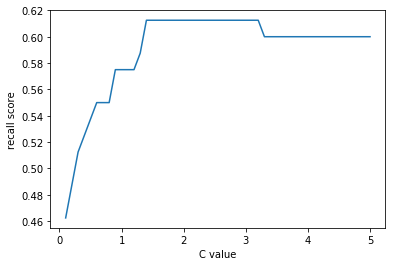

In [32]:
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

- still not getting a recall value of greater than 70%
- remember our data had more non-diabetes results than diabetes results. perhaps this inbalance is causing an issue
- unbalanced classes are common in datasets, and there are more of one class than the other
- in our case, 65% of our results are non-diabetes, and 35% are diabetes
- in logistics regression, there is a hyperparameter than will tell the model to compensate for the class unbalance
- **if you still have time, go to slides at this point**


### Logistic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0,0.5,'recall score')

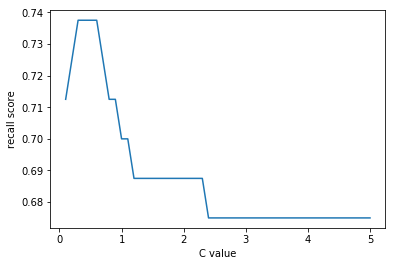

In [35]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [38]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Confusion Matrix
[[106  45]
 [ 21  59]]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231

0.7375


### LogisticRegression Cross Validation 

In [40]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

- using a cross validation method is intensive, so we set n-jobs=-1, to tell the application to use all the cores on our system.
- setting cv is the number of folds, so we use 10.
- set Cs as an integer for the number of times the algorithm will try to find the hyperparameter per fold; not sure what that means

### Predict on Test Data

In [41]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Confusion Matrix
[[109  42]
 [ 26  54]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.72      0.76       151
          1       0.56      0.68      0.61        80

avg / total       0.72      0.71      0.71       231



- result is a less higher recall score, but the model will most likely perform better on real world data
- also, as you can see, there are so many other parameters to try to play around with to push the score even higher. refer to sk-learn documentation for background info on each one.
- have to also remember when to stop!